In [1]:
import bagpy
import math
from math import radians, cos, sin, asin, sqrt, pi
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#extract csv from bag files
def data_csv(b):

    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)

    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [3]:
b = bagreader("/home/krishna/LAB2/src/gnss_driver/data/open_walking.bag")
csv_data = data_csv(b)

[INFO]  Data folder /home/krishna/LAB2/src/gnss_driver/data/open_walking already exists. Not creating.
/home/krishna/LAB2/src/gnss_driver/data/open_walking/gps.csv


In [4]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gnss_driver/gps_msg,92,1.000647


In [5]:
df_gps = pd.read_csv("/home/krishna/LAB2/src/gnss_driver/data/open_walking/gps.csv")

In [6]:
df_gps

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,HDOP,Fix_quality,UTM_easting,UTM_northing,UTC,Zone,Letter
0,1.677019e+09,735,224025,0,GPS1_Frame,42.307976,-71.107376,28.000000,0.74,5,326312.18750,4686122.0,224025.0,19,T
1,1.677019e+09,736,224026,0,GPS1_Frame,42.307972,-71.107368,28.000000,0.74,5,326312.90625,4686121.5,224026.0,19,T
2,1.677019e+09,737,224027,0,GPS1_Frame,42.307968,-71.107368,28.000000,0.74,5,326313.37500,4686121.0,224027.0,19,T
3,1.677019e+09,738,224028,0,GPS1_Frame,42.307964,-71.107361,28.100000,0.74,5,326313.93750,4686120.5,224028.0,19,T
4,1.677019e+09,739,224029,0,GPS1_Frame,42.307961,-71.107353,28.500000,0.70,5,326314.59375,4686120.5,224029.0,19,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.677019e+09,822,224152,0,GPS1_Frame,42.307968,-71.107384,29.299999,0.73,5,326311.50000,4686121.0,224152.0,19,T
88,1.677019e+09,823,224153,0,GPS1_Frame,42.307972,-71.107384,29.200001,0.72,5,326311.96875,4686121.5,224153.0,19,T
89,1.677019e+09,824,224154,0,GPS1_Frame,42.307980,-71.107376,29.100000,0.68,5,326312.43750,4686122.0,224154.0,19,T
90,1.677019e+09,825,224155,0,GPS1_Frame,42.307983,-71.107368,29.200001,0.68,5,326312.87500,4686123.0,224155.0,19,T


In [7]:
df_gps['Fix_quality'].value_counts()

5    92
Name: Fix_quality, dtype: int64

In [8]:
#median data

df_gps['UTM_easting_median'] = df_gps['UTM_easting'] - df_gps['UTM_easting'].median(axis=0)
df_gps['UTM_northing_median'] = df_gps['UTM_northing'] - df_gps['UTM_northing'].median(axis=0)

In [9]:
df_gps['UTM_easting'].median(axis=0), df_gps['UTM_northing'].median(axis=0)

(326316.796875, 4686111.25)

In [10]:
df_gps['UTM_easting_median'], df_gps['UTM_northing_median'] 

(0    -4.609375
 1    -3.890625
 2    -3.421875
 3    -2.859375
 4    -2.203125
         ...   
 87   -5.296875
 88   -4.828125
 89   -4.359375
 90   -3.921875
 91   -3.640625
 Name: UTM_easting_median, Length: 92, dtype: float64,
 0     10.75
 1     10.25
 2      9.75
 3      9.25
 4      9.25
       ...  
 87     9.75
 88    10.25
 89    10.75
 90    11.75
 91    11.75
 Name: UTM_northing_median, Length: 92, dtype: float64)

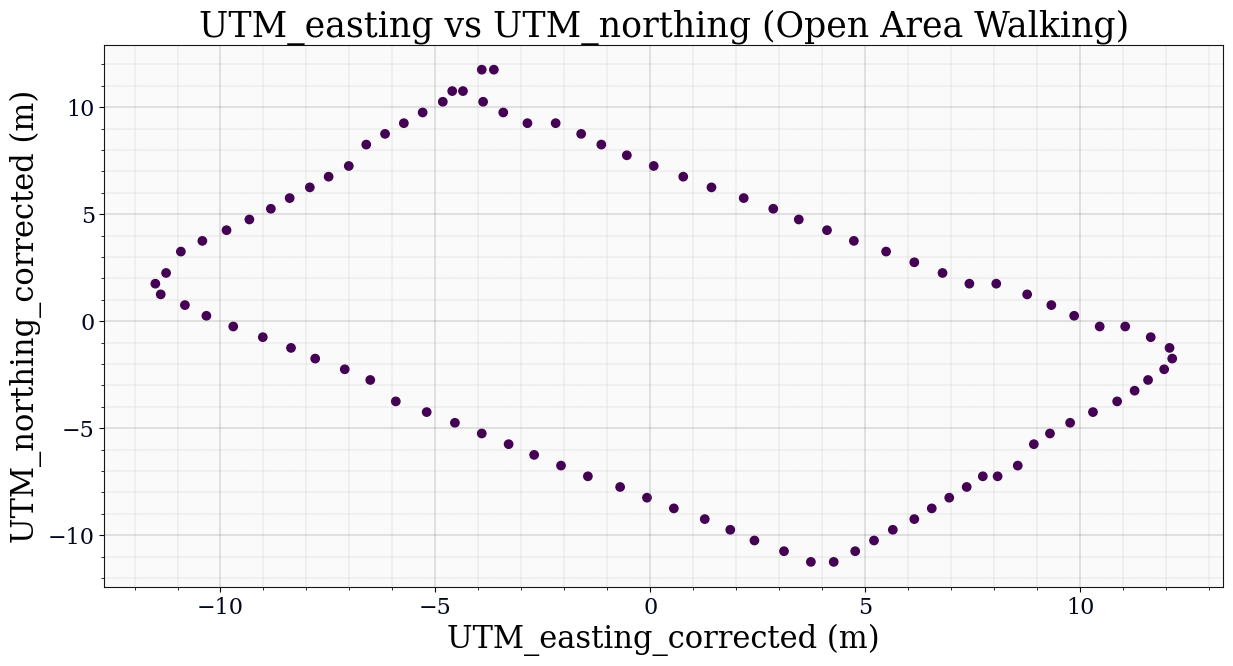

In [11]:
#corrected - the minimum of the each data in easting and northing was subtracted 
#from the  easting and northing datapoints respectively. 
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=df_gps, c = 'Fix_quality')
plt.xlabel("UTM_easting_corrected (m)")
plt.ylabel("UTM_northing_corrected (m)")
plt.title("UTM_easting vs UTM_northing (Open Area Walking)", fontsize=25)
plt.savefig('/home/krishna/LAB2/src/gnss_driver/analysis/open_analysis/plots_stationary_no_occlusion/open_walking.png')
plt.show()


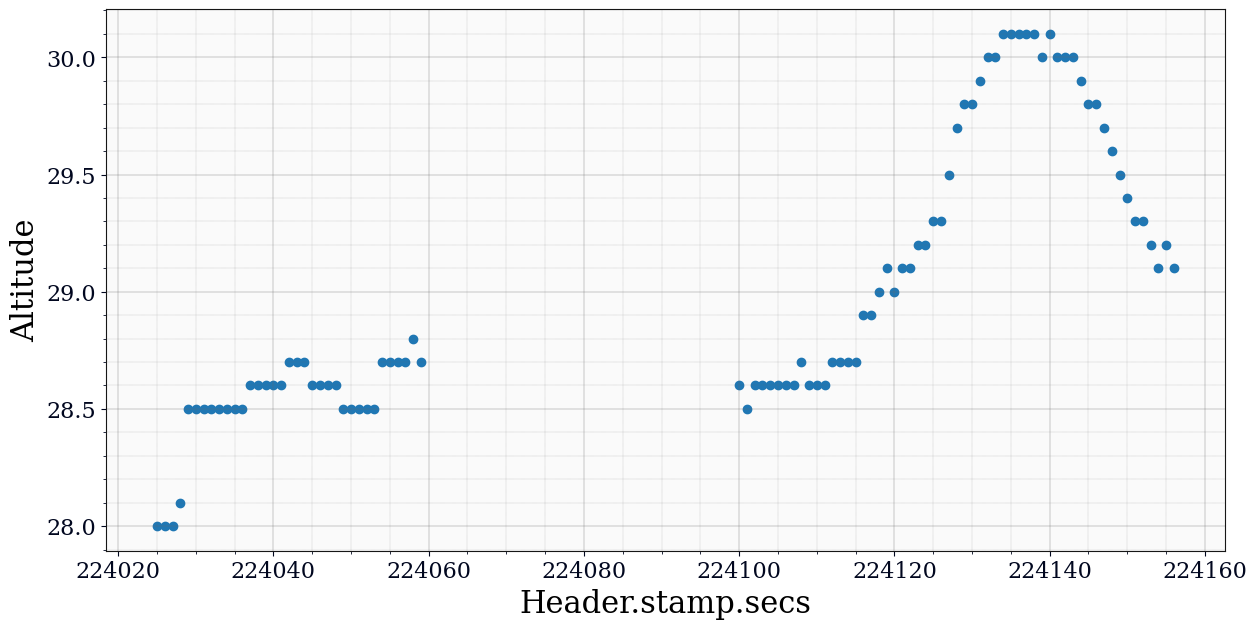

In [12]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Header.stamp.secs', y='Altitude', data=df_gps)
plt.xlabel("Header.stamp.secs")

plt.ylabel("Altitude")
plt.show()

In [13]:
#mean, variance

[ df_gps['Altitude'].mean(), df_gps['Altitude'].var() ]

[29.007608890533447, 0.3470842033111196]

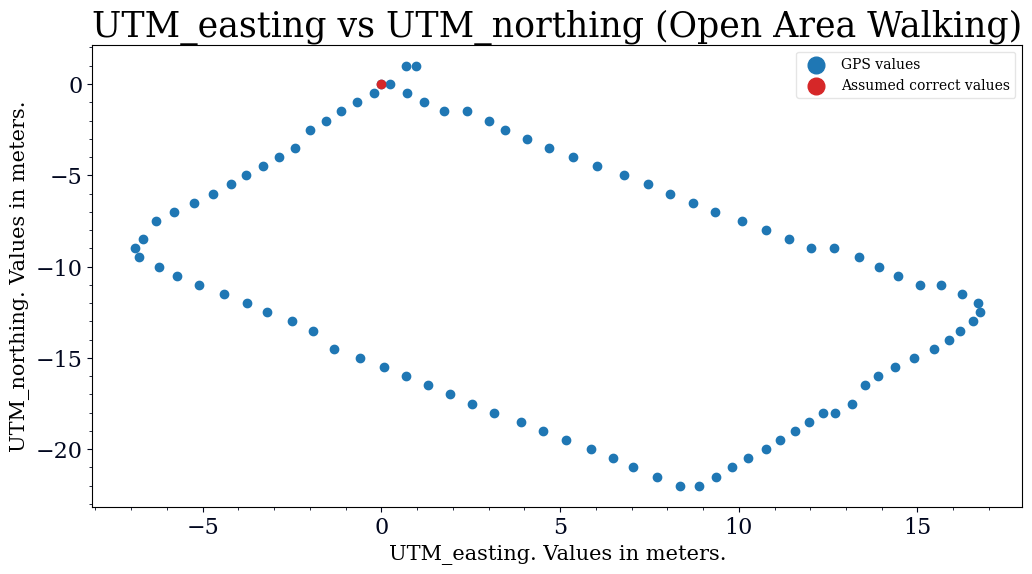

In [14]:
df_gps = pd.read_csv("/home/krishna/LAB2/src/gnss_driver/data/open_walking/gps.csv")
fig, ax = plt.subplots()
ax.scatter(df_gps['UTM_easting'] - df_gps['UTM_easting'][0], df_gps['UTM_northing'] - df_gps['UTM_northing'][0], c='tab:blue', label='GPS values')

plt.scatter(0, 0, c='tab:red', label='Assumed correct values')
plt.title("UTM_easting vs UTM_northing (Open Area Walking)", fontsize=25)
plt.xlabel("UTM_easting. Values in meters.",fontsize=15)
plt.ylabel("UTM_northing. Values in meters.", fontsize=15)
ax.legend()
plt.savefig('/home/krishna/LAB2/src/gnss_driver/analysis/open_analysis/plots_stationary_no_occlusion/open_area_walking.png')
plt.show()

In [15]:
def distanceInKmBetweenEarthCoordinates(a1 , b1, a2, b2):
  return math.sqrt((a1-a2)**2 + (b1-b2)**2)

northing_original = 4686126.5
easting_original = 326315.78125

distance_error = []

for i in range(df_gps.shape[0]):

  answer = distanceInKmBetweenEarthCoordinates(df_gps.UTM_easting[i], df_gps.UTM_northing[i], easting_original, northing_original)

  distance_error.append(answer)

import statistics

mean = statistics.mean(distance_error)

stdev = statistics.stdev(distance_error)

print("Mean:", mean)
print("Standard deviation:", stdev)


Mean: 16.8797760014381
Standard deviation: 6.717566707553915
